# Imported Library

Please import all necessary library that will be needed in this kernel here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, LeaveOneOut, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Imported Dataset

Please import your dataset in pandas dataframe form. You can find the dataset in '../data/' directory. Don't forget to display the 5 top and size of dataset to give us initial idea about what kind dataset that we're going to analyze.

In [2]:
data_train = pd.read_csv('dataPreprocessed/classification_train.csv')
data_train.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,0.02,0.141434,0.201904,0.284865,0.340651,0.419393,0.278769,0.235939,0.228697,0.124950,0.350561,0.031990,0.000000,0.314815,0,2,1,2,2,2,2,2,1,1
1,0.00,0.088774,0.051116,0.151372,0.218692,0.321427,0.379269,0.032079,0.783208,0.598802,0.600962,0.070164,0.078960,0.092593,1,1,2,2,1,1,2,2,2,0
2,0.26,0.241978,0.327153,0.437523,0.531247,0.674421,0.725578,0.219831,0.532581,0.000000,0.921474,0.000000,0.464468,0.111111,0,2,2,2,2,2,3,3,3,0
3,0.32,0.348188,0.425493,0.498933,0.588023,0.640052,0.713425,0.291626,0.329731,0.488423,0.240385,0.639795,0.464468,0.148148,1,2,2,2,2,2,2,2,2,0
4,0.16,0.258096,0.332566,0.458031,0.575928,0.668831,0.742169,0.000000,0.867638,0.399202,0.000000,0.426530,0.696702,0.425926,0,2,2,3,4,3,3,3,2,0


In [3]:
data_test = pd.read_csv('dataPreprocessed/classification_test.csv')
data_test.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,0.42,0.594409,0.767089,0.756959,0.830450,0.832032,0.759349,0.555478,0.469925,0.453293,0.402444,0.313286,0.464468,0.166667,0,2,2,2,2,2,2,2,2,0
1,0.12,0.351639,0.368577,0.381727,0.448290,0.546885,0.590230,0.221775,0.220395,0.194012,0.201723,0.219237,0.212030,0.351852,1,1,1,2,2,2,2,2,2,0
2,0.04,0.207478,0.275572,0.342656,0.427143,0.517272,0.582324,0.249965,0.313283,0.319361,0.200321,0.213265,0.232234,0.185185,1,2,2,2,2,2,2,2,2,0
3,0.02,0.134908,0.211832,0.288377,0.355373,0.424523,0.485739,0.555478,0.000157,0.129940,0.000000,0.139689,0.151649,0.037037,1,1,2,2,2,4,3,3,2,0
4,0.08,0.198373,0.268969,0.361928,0.458290,0.557672,0.623634,0.201916,0.232456,0.299002,0.218950,0.242909,0.473525,0.148148,0,1,2,2,2,2,2,2,2,1


# Modelling Phase

## Training Phase & Testing Phase

In [4]:
X_train = data_train.drop(['default.payment.next.month'], axis=1)
y_train = data_train['default.payment.next.month']

X_test = data_test.drop(['default.payment.next.month'], axis=1)
y_test = data_test['default.payment.next.month']

### Decision Tree

In [5]:
# Machine learning model 1 training phase
model_dt = DecisionTreeClassifier(criterion = 'entropy')
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
pred_dt = model_dt.predict(X_test)
pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Random Forest 

In [7]:
# Machine learning model 2 training phase
model_rf = RandomForestClassifier(criterion ='entropy')
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
pred_rf = model_rf.predict(X_test)
pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Gradient Boosting 

In [9]:
# Machine learning model 3 training phase
model_gb = GradientBoostingClassifier() 
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
pred_gb = model_gb.predict(X_test)
pred_gb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Optimization Phase

## Random Search + K-Fold

In [11]:
from scipy.stats import randint as sp_randint

X = X_train.append(X_test).values
y = y_train.append(y_test).values

In [12]:
tuned_params = {   "max_depth": sp_randint(1, 4),
                      "min_samples_leaf"  : sp_randint(2, 11),
                      'min_samples_split' : sp_randint(2, 11)}

### Decision Tree

In [13]:
random_search_dt = RandomizedSearchCV(model_dt, tuned_params,
                                  n_iter = 20, cv = 10)

random_search_dt.fit(X, y)
print("Best Params for Decision Tree: ",random_search_dt.best_params_)
print()

means = random_search_dt.cv_results_['mean_test_score']
stds = random_search_dt.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_dt.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params for Decision Tree:  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6}

0.775 (+/-0.020) for {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 9}
0.777 (+/-0.018) for {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.775 (+/-0.020) for {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.775 (+/-0.021) for {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.775 (+/-0.020) for {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 9}
0.775 (+/-0.020) for {'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 7}
0.775 (+/-0.021) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.775 (+/-0.021) for {'max_depth': 2, 'min_samples_leaf': 9, 'min_samples_split': 7}
0.777 (+/-0.018) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 4}
0.777 (+/-0.018) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.775 (+/-0.021) for {'max_depth': 2, 'min_samples_le

In [14]:
model_dt_2 = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = random_search_dt.best_params_['max_depth'],
                                   min_samples_leaf = random_search_dt.best_params_['min_samples_leaf'],
                                   min_samples_split = random_search_dt.best_params_['min_samples_split'])

In [15]:
model_dt_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
kf = KFold(n_splits=20, random_state=45)
kf.get_n_splits(X)
from sklearn.metrics import accuracy_score
print(kf)

# save our score
scoring = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_dt_2.fit(X_train,y_train)
    pred = model_dt_2.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Decision Tree : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
score_rata_dt = scoring.mean()
print(score_rata_dt)

KFold(n_splits=20, random_state=45, shuffle=False)
Score in Decision Tree :  0.7696551724137931
Score in Decision Tree :  0.7503448275862069
Score in Decision Tree :  0.7737931034482759
Score in Decision Tree :  0.7682758620689655
Score in Decision Tree :  0.7958620689655173
Score in Decision Tree :  0.7724137931034483
Score in Decision Tree :  0.776551724137931
Score in Decision Tree :  0.7720994475138122
Score in Decision Tree :  0.7665745856353591
Score in Decision Tree :  0.7941988950276243
Score in Decision Tree :  0.7665745856353591
Score in Decision Tree :  0.7582872928176796
Score in Decision Tree :  0.7969613259668509
Score in Decision Tree :  0.7803867403314917
Score in Decision Tree :  0.7762430939226519
Score in Decision Tree :  0.7914364640883977
Score in Decision Tree :  0.7969613259668509
Score in Decision Tree :  0.7803867403314917
Score in Decision Tree :  0.787292817679558
Score in Decision Tree :  0.7679558011049724
0.7771127833873119


### Random Forest 

In [17]:
random_search_rf = RandomizedSearchCV(model_rf, tuned_params,
                                  n_iter = 20, cv = 10)

random_search_rf.fit(X, y)
print("Best Params for Random Forest: ",random_search_rf.best_params_)
print()

means = random_search_rf.cv_results_['mean_test_score']
stds = random_search_rf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_rf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params for Random Forest:  {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 8}

0.738 (+/-0.015) for {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 7}
0.763 (+/-0.012) for {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 8}
0.736 (+/-0.016) for {'max_depth': 1, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.758 (+/-0.012) for {'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 5}
0.742 (+/-0.016) for {'max_depth': 1, 'min_samples_leaf': 8, 'min_samples_split': 4}
0.762 (+/-0.013) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 5}
0.757 (+/-0.012) for {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.742 (+/-0.017) for {'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 8}
0.757 (+/-0.014) for {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 3}
0.738 (+/-0.019) for {'max_depth': 1, 'min_samples_leaf': 7, 'min_samples_split': 6}
0.756 (+/-0.009) for {'max_depth': 2, 'min_samples_l

In [18]:
model_rf_2 = RandomForestClassifier(criterion = 'entropy',
                                   max_depth = random_search_rf.best_params_['max_depth'],
                                   min_samples_leaf = random_search_rf.best_params_['min_samples_leaf'],
                                   min_samples_split = random_search_rf.best_params_['min_samples_split'])

In [19]:
model_rf_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
kf = KFold(n_splits=20, random_state=45)
kf.get_n_splits(X)
from sklearn.metrics import accuracy_score
print(kf)

# save our score
scoring = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_rf_2.fit(X_train, y_train)
    pred = model_rf_2.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Random Forest : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
score_rata_rf = scoring.mean()
print(score_rata_rf)

KFold(n_splits=20, random_state=45, shuffle=False)
Score in Random Forest :  0.766896551724138
Score in Random Forest :  0.7379310344827587
Score in Random Forest :  0.7586206896551724
Score in Random Forest :  0.766896551724138
Score in Random Forest :  0.7710344827586207
Score in Random Forest :  0.766896551724138
Score in Random Forest :  0.7503448275862069
Score in Random Forest :  0.7527624309392266
Score in Random Forest :  0.7541436464088398
Score in Random Forest :  0.7845303867403315
Score in Random Forest :  0.761049723756906
Score in Random Forest :  0.744475138121547
Score in Random Forest :  0.7776243093922652
Score in Random Forest :  0.761049723756906
Score in Random Forest :  0.7638121546961326
Score in Random Forest :  0.7845303867403315
Score in Random Forest :  0.7845303867403315
Score in Random Forest :  0.761049723756906
Score in Random Forest :  0.7707182320441989
Score in Random Forest :  0.7513812154696132
0.7635139074109355


### Gradient Boosting 

In [21]:
random_search_gb = RandomizedSearchCV(model_gb, tuned_params,
                                  n_iter = 20, cv = 10)

random_search_gb.fit(X, y)
print("Best Params for Gradient Boosting: ",random_search_gb.best_params_)
print()

means = random_search_gb.cv_results_['mean_test_score']
stds = random_search_gb.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_gb.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params for Gradient Boosting:  {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 8}

0.776 (+/-0.018) for {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.776 (+/-0.017) for {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 6}
0.775 (+/-0.017) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.774 (+/-0.018) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 9}
0.777 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.776 (+/-0.017) for {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.775 (+/-0.017) for {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.775 (+/-0.017) for {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 9}
0.775 (+/-0.017) for {'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 8}
0.775 (+/-0.017) for {'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.775 (+/-0.017) for {'max_depth': 1, 'min_samp

In [22]:
model_gb_2 = GradientBoostingClassifier(max_depth = random_search_gb.best_params_['max_depth'],
                                   min_samples_leaf = random_search_gb.best_params_['min_samples_leaf'],
                                   min_samples_split = random_search_gb.best_params_['min_samples_split'])

In [23]:
model_gb_2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
kf = KFold(n_splits=20, random_state=45)
kf.get_n_splits(X)
from sklearn.metrics import accuracy_score
print(kf)

# save our score
scoring = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_gb_2.fit(X_train, y_train)
    pred = model_gb_2.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Random Forest : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
score_rata_gb = scoring.mean()
print(score_rata_gb)

KFold(n_splits=20, random_state=45, shuffle=False)
Score in Random Forest :  0.7696551724137931
Score in Random Forest :  0.7503448275862069
Score in Random Forest :  0.7655172413793103
Score in Random Forest :  0.7627586206896552
Score in Random Forest :  0.7944827586206896
Score in Random Forest :  0.776551724137931
Score in Random Forest :  0.7737931034482759
Score in Random Forest :  0.7624309392265194
Score in Random Forest :  0.7693370165745856
Score in Random Forest :  0.7969613259668509
Score in Random Forest :  0.7679558011049724
Score in Random Forest :  0.7582872928176796
Score in Random Forest :  0.7997237569060773
Score in Random Forest :  0.7817679558011049
Score in Random Forest :  0.7803867403314917
Score in Random Forest :  0.7983425414364641
Score in Random Forest :  0.7859116022099447
Score in Random Forest :  0.7762430939226519
Score in Random Forest :  0.7941988950276243
Score in Random Forest :  0.7638121546961326
0.776423128214898


## Ensamble Phase (optional)

<hr>

# Evaluation

From data modeling that has been done, please state your evaluation/conclusion related to:

1. Our dataset behaviour (how our prediction characteristic & trend)
2. Model Analysis, including their parameter & performance
3. Result after optimization phase
4. Relate your analysis with EDA & preprocessing that you have done before
5. Another improvement that must be done to increase your model performance

In [25]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [31]:
X_train_grph = data_train.drop(['default.payment.next.month'], axis=1)
X_test_grph = data_test.drop(['default.payment.next.month'], axis=1)

y_train_grph = data_train['default.payment.next.month']
y_test_grph = data_test['default.payment.next.month']

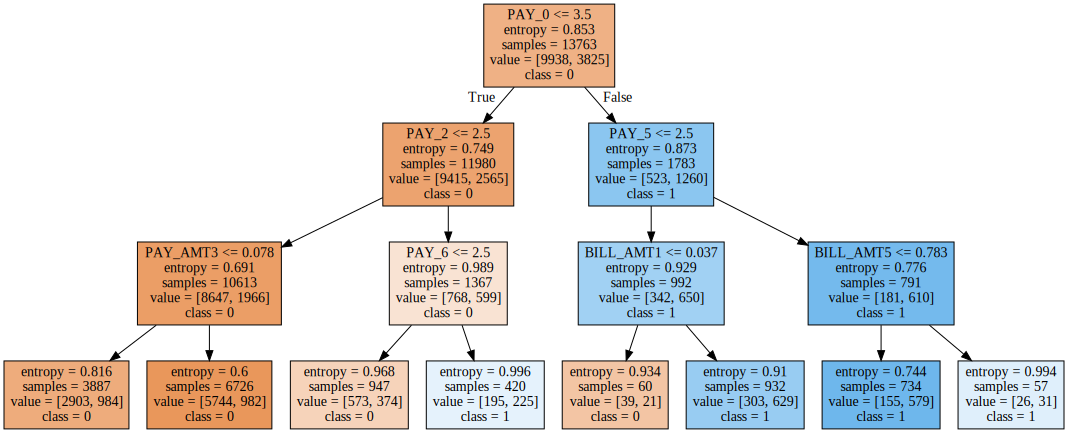

In [30]:
# Dataset behaviour (Decision Tree Optimized)
labels = X_train_grph.append(X_test_grph).columns

graph = Source(tree.export_graphviz(model_dt_2,
                                   out_file = None,
                                   feature_names = labels,
                                   class_names = ['0', '1'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))

In [33]:
# Model analysis
print('Decision Tree Akurasi :', model_dt.score(X_test_grph, y_test_grph))
print('Random Forest Akurasi :', model_rf.score(X_test_grph, y_test_grph))
print('Gradient Boosting Akurasi :', model_gb.score(X_test_grph, y_test_grph))

Decision Tree Akurasi : 0.6842650103519669
Random Forest Akurasi : 0.7784679089026915
Gradient Boosting Akurasi : 0.777087646652864


### Optimization

In [36]:
# Result after optimization phase
print('Decision Tree Akurasi :', model_dt_2.score(X_test_grph, y_test_grph))
print('Random Forest Akurasi :', model_rf_2.score(X_test_grph, y_test_grph))
print('Gradient Boosting Akurasi :', model_gb_2.score(X_test_grph, y_test_grph))

Decision Tree Akurasi : 0.7836438923395446
Random Forest Akurasi : 0.7681159420289855
Gradient Boosting Akurasi : 0.7843340234644582


### Optimization + K-Fold (Rata-Rata)

In [35]:
print('Decision Tree Akurasi :', score_rata_dt)
print('Random Forest Akurasi :', score_rata_rf)
print('Gradient Boosting Akurasi :', score_rata_gb)

Decision Tree Akurasi : 0.7771127833873119
Random Forest Akurasi : 0.7635139074109355
Gradient Boosting Akurasi : 0.776423128214898


#### EDA & preprocessing relation analysis

Penggunaan EDA dan Preprocessing membuat model menjadi lebih baik, karena mengurangi beberapa outlier, sehingga menghasilkan data yang cukup baik. Selain itu terdapat proses normalisasi menggunakan MinMax Scaler dan Endoder 

In [ ]:
# Another improvement